### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

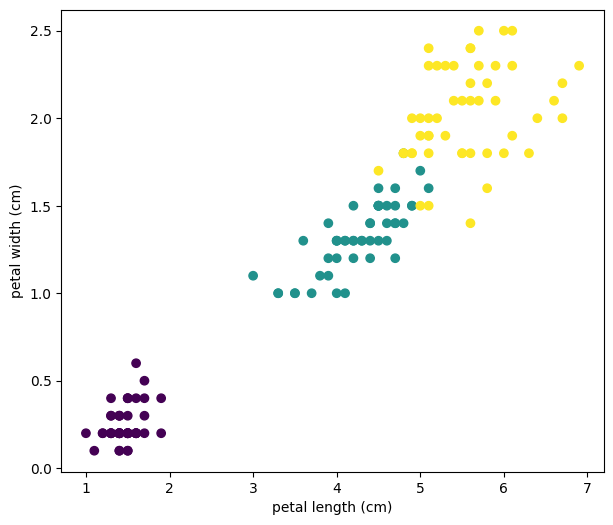

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training LinearSVC with C = 0.01


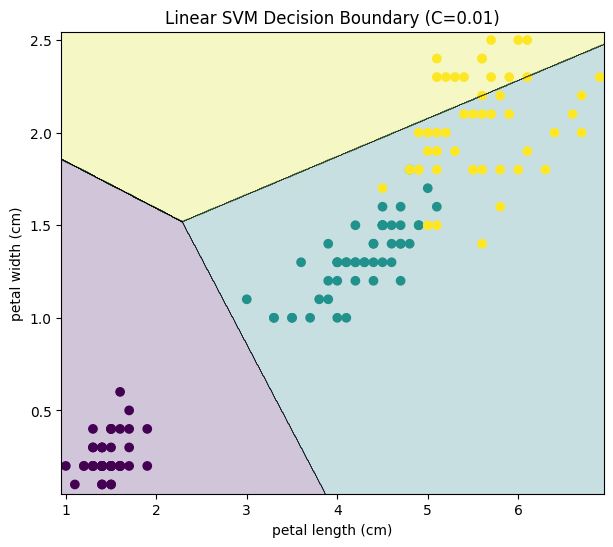

Training LinearSVC with C = 0.1


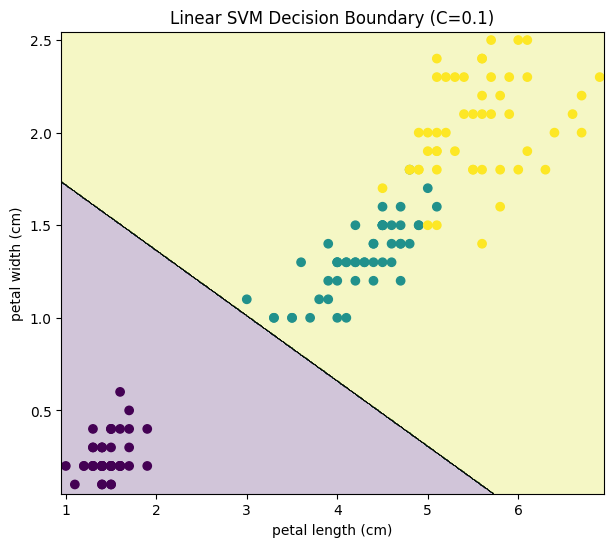

Training LinearSVC with C = 1.0


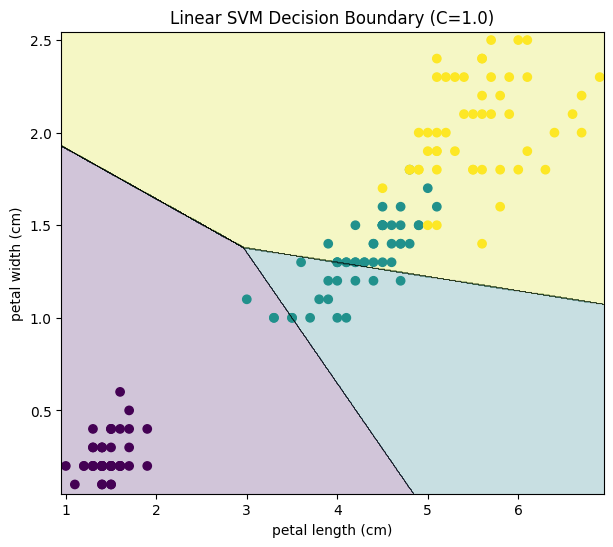

Training LinearSVC with C = 10.0


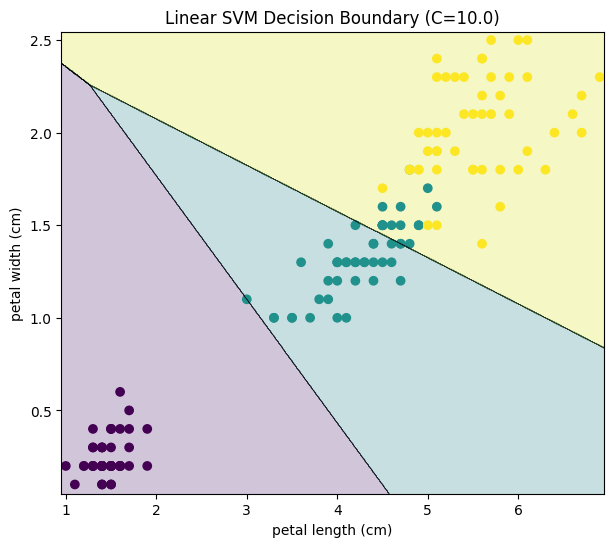

Training LinearSVC with C = 100.0


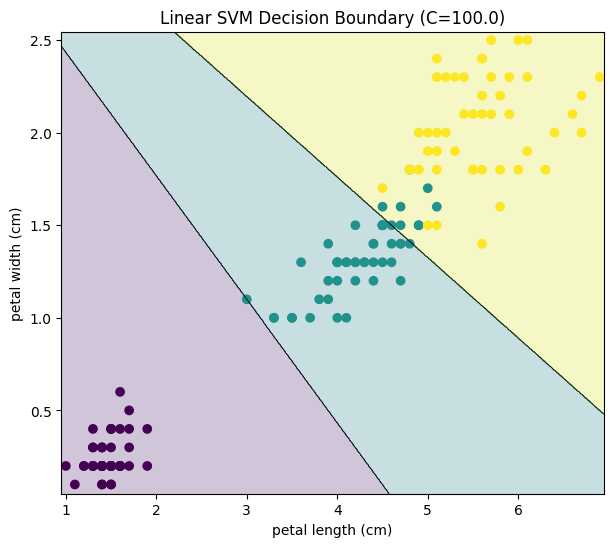

In [6]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    print(f"Training LinearSVC with C = {C}")
    lin_svm = LinearSVC(loss='hinge', C=C, random_state=42, max_iter=100000)
    lin_svm.fit(X_train, y_train)
    plot_decision_boundary(lin_svm, X, y)
    plt.title(f'Linear SVM Decision Boundary (C={C})')
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [7]:
#TODO
chosen_C = 1.0
lin_svm_chosen = LinearSVC(loss='hinge', C=chosen_C, random_state=42, max_iter=100000)
lin_svm_chosen.fit(X_train, y_train)

test_accuracy = lin_svm_chosen.score(X_test, y_test)
test_error = 1 - test_accuracy

print(f"Test accuracy with C = {chosen_C}: {test_accuracy:.4f}")
print(f"Test error with C = {chosen_C}: {test_error:.4f}")

Test accuracy with C = 1.0: 0.8333
Test error with C = 1.0: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with RBF kernel, C = 1.0, and gamma = 0.01


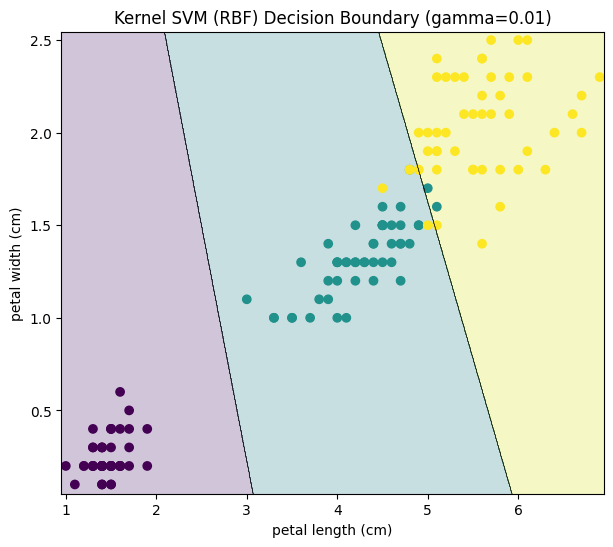

Training SVC with RBF kernel, C = 1.0, and gamma = 0.1


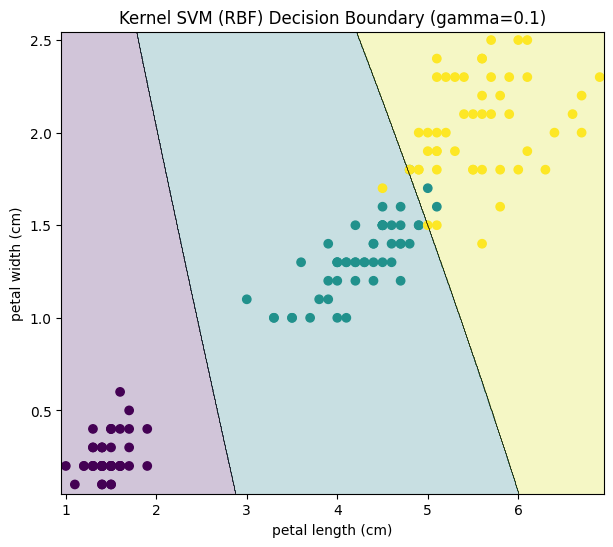

Training SVC with RBF kernel, C = 1.0, and gamma = 1.0


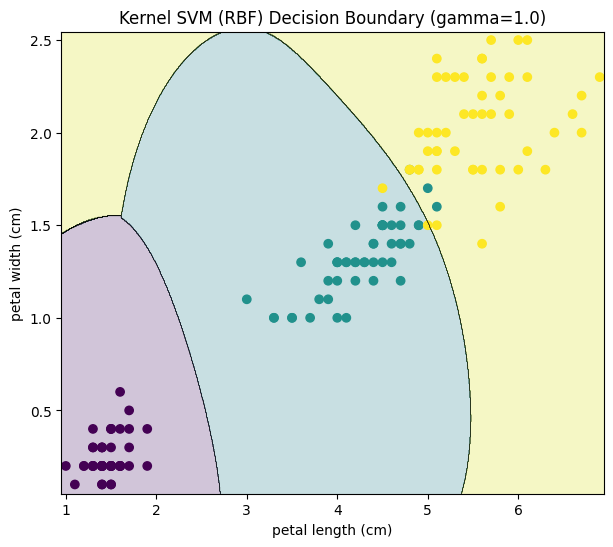

Training SVC with RBF kernel, C = 1.0, and gamma = 10.0


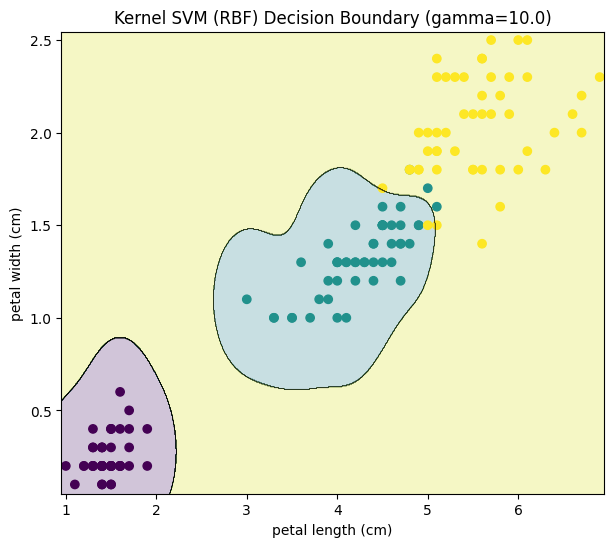

Training SVC with RBF kernel, C = 1.0, and gamma = 100.0


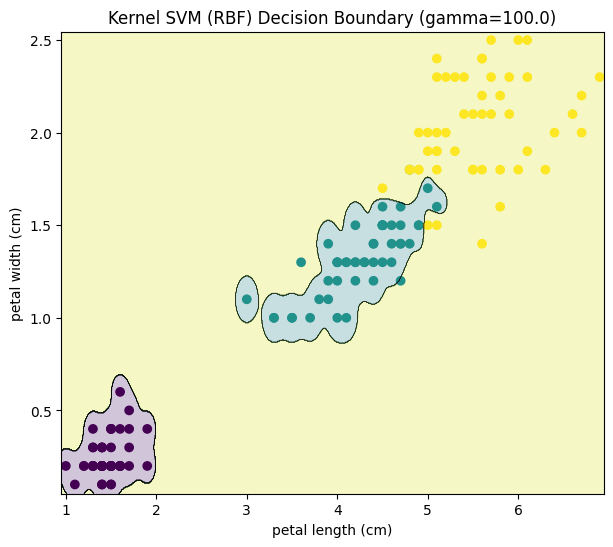

In [8]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    print(f"Training SVC with RBF kernel, C = 1.0, and gamma = {gamma}")
    rbf_svm = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42)
    rbf_svm.fit(X_train, y_train)
    plot_decision_boundary(rbf_svm, X, y)
    plt.title(f'Kernel SVM (RBF) Decision Boundary (gamma={gamma})')
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [9]:
#TODO
chosen_gamma = 1.0

print(f"Training SVC with RBF kernel, C = 1.0, and chosen gamma = {chosen_gamma}")
rbf_svm_chosen = SVC(kernel='rbf', C=1.0, gamma=chosen_gamma, random_state=42)
rbf_svm_chosen.fit(X_train, y_train)

test_accuracy_rbf = rbf_svm_chosen.score(X_test, y_test)
test_error_rbf = 1 - test_accuracy_rbf
n_support_vectors = rbf_svm_chosen.support_vectors_.shape[0]

print(f"Test accuracy with gamma = {chosen_gamma}: {test_accuracy_rbf:.4f}")
print(f"Test error with gamma = {chosen_gamma}: {test_error_rbf:.4f}")
print(f"Number of support vectors: {n_support_vectors}")

Training SVC with RBF kernel, C = 1.0, and chosen gamma = 1.0
Test accuracy with gamma = 1.0: 1.0000
Test error with gamma = 1.0: 0.0000
Number of support vectors: 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [11]:
#TODO
# Kernel SVM  สามารถจับลักษณะความสัมพันธ์ที่ไม่เชิงเส้นได้ดี
#1. SVM ที่ใช้ RBF kernel (กำหนดค่า γ = 1.0) สามารถทำ ความแม่นยำบนชุดทดสอบได้เต็ม 1.0000 และมี ข้อผิดพลาดเท่ากับ 0.0000
#ผลลัพธ์นี้แสดงให้เห็นว่า Kernel SVM มีประสิทธิภาพสูงในการจับความสัมพันธ์ที่ซับซ้อนและไม่เป็นเชิงเส้นในข้อมูล

#RBF kernel ช่วยให้โมเดลสามารถสร้าง เส้นแบ่งเขตการตัดสินใจ (decision boundary) ที่โค้งงอและมีความซับซ้อน ทำให้สามารถแยกข้อมูลที่ไม่สามารถแบ่งได้ด้วยเส้นตรงเพียงเส้นเดียวได้
#สำหรับข้อมูล Iris วิธีนี้จึงให้ผลการจำแนกที่แม่นยำกว่าการใช้ Linear SVM ซึ่งสามารถสร้างได้เพียงเส้นแบ่งแบบเส้นตรงเท่านั้น